# Loan Prediction
### using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


### Importing & Loading the dataset

In [2]:
df = pd.read_csv('D:/Projects/Python/Loan Approval/LoanData Train file.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    object 
 1   Gender             544 non-null    object 
 2   Married            551 non-null    object 
 3   Dependents         541 non-null    object 
 4   Education          554 non-null    object 
 5   Self_Employed      525 non-null    object 
 6   ApplicantIncome    554 non-null    int64  
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         533 non-null    float64
 9   Loan_Amount_Term   540 non-null    float64
 10  Credit_History     508 non-null    float64
 11  Property_Area      554 non-null    object 
 12  Loan_Status        554 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 56.4+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,554.000000,554.000000,533.000000,540.000000,508.000000
mean,5434.173285,1542.687581,145.011257,343.022222,0.844488
std,6319.304408,2121.525979,83.702165,63.936363,0.362749
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.000000,1.000000
50%,3806.000000,1239.500000,126.000000,360.000000,1.000000
75%,5741.000000,2297.250000,162.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [5]:
pd.crosstab(df.Credit_History, df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,72,7,79
1.0,89,340,429
All,161,347,508


### Checking for Outliers

<Axes: >

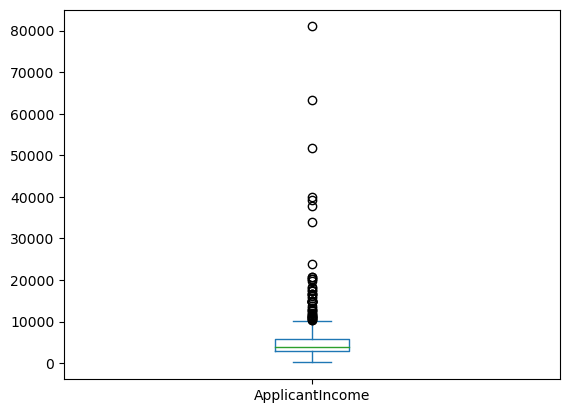

In [6]:
df.ApplicantIncome.plot( kind= "box" )

### Checking Skewness in Data

<Axes: ylabel='Frequency'>

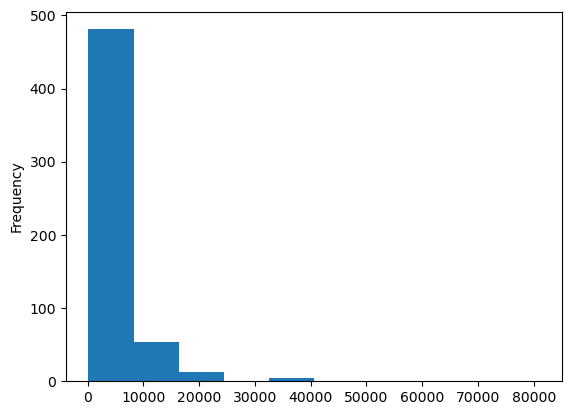

In [7]:
df.ApplicantIncome.plot(kind= "hist")

<Axes: ylabel='Frequency'>

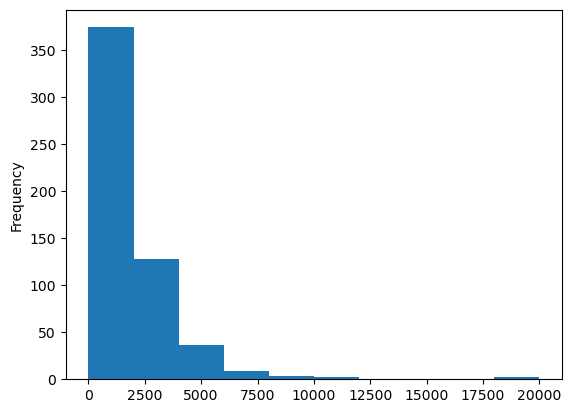

In [8]:
df.CoapplicantIncome.plot(kind= "hist")

In [9]:
# we will need to normalize the data as we move forward

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

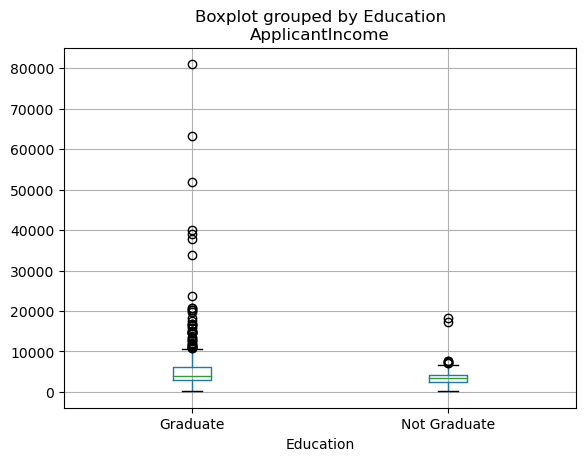

In [10]:
df.boxplot( column="ApplicantIncome", by= "Education")
# This shows that Applicant income is not effected by Education.

<Axes: >

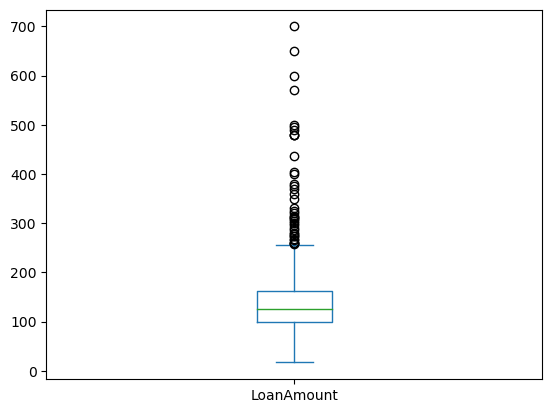

In [11]:
df.LoanAmount.plot( kind="box" )

<Axes: ylabel='Frequency'>

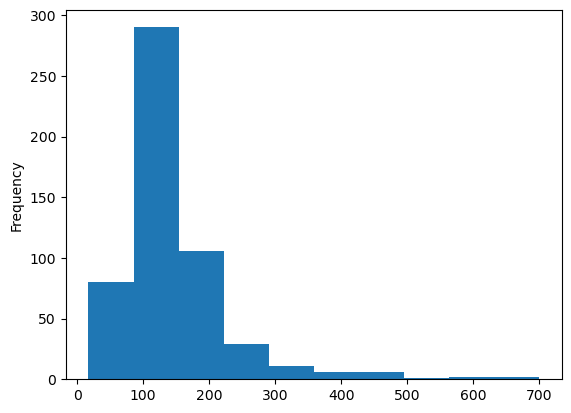

In [12]:
df.LoanAmount.plot(kind="hist")

In [13]:
df["LoanAmount_log"]= np.log(df.LoanAmount)

<Axes: ylabel='Frequency'>

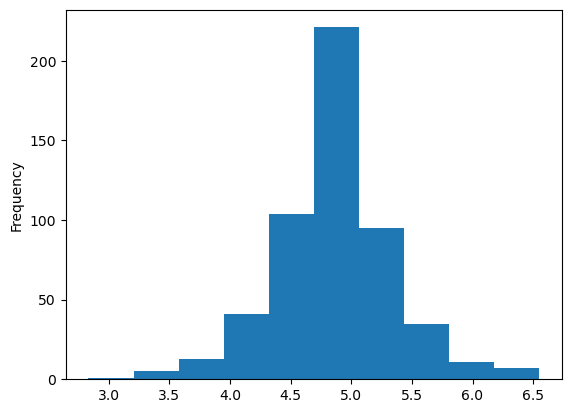

In [14]:
df.LoanAmount_log.plot(kind="hist")

### Dataset Shape:

In [15]:
df.shape[0]

554

## Data Cleaning

### Checking the Missing Values

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       46
Property_Area         0
Loan_Status           0
LoanAmount_log       21
dtype: int64

#### Missing Values in Percentage

In [17]:
(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               1.805054
Married              0.541516
Dependents           2.346570
Education            0.000000
Self_Employed        5.234657
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.790614
Loan_Amount_Term     2.527076
Credit_History       8.303249
Property_Area        0.000000
Loan_Status          0.000000
LoanAmount_log       3.790614
dtype: float64

#### First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [18]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:

df.Gender.fillna( df.Gender.mode()[0], inplace= True )
df.Married.fillna( df.Married.mode()[0], inplace= True )
df.Dependents.fillna( df.Dependents.mode()[0], inplace= True )
df.Self_Employed.fillna( df.Self_Employed.mode()[0], inplace= True )

df.LoanAmount.fillna( df.LoanAmount.mean(), inplace= True )
df.LoanAmount_log.fillna( df.LoanAmount_log.mean(), inplace=True )

df.Loan_Amount_Term.fillna( df.Loan_Amount_Term.mode()[0], inplace= True )

df.Credit_History.fillna(df.Credit_History.mode()[0],inplace= True) 


In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [21]:
df["TotalIncome"]= df.ApplicantIncome + df.CoapplicantIncome


<Axes: ylabel='Frequency'>

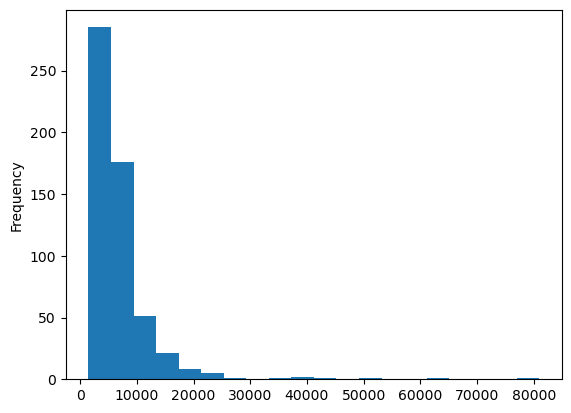

In [22]:
df.TotalIncome.plot(kind="hist" , bins=20)

In [23]:
df["TotalIncome_log"]= np.log(df.TotalIncome)

<Axes: ylabel='Frequency'>

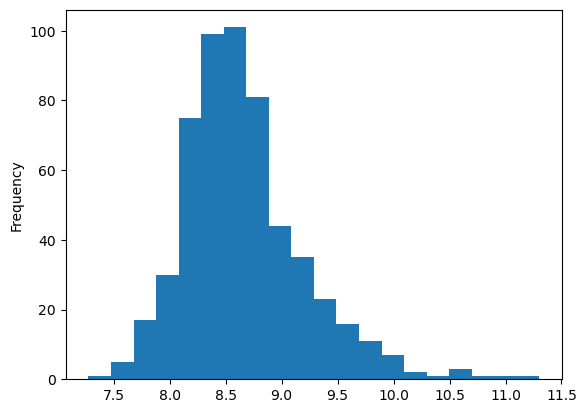

In [24]:
df.TotalIncome_log.plot(kind="hist" , bins=20)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.011257,360.0,1.0,Urban,Y,4.854845,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [26]:
X = df.iloc[:,np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:,12].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=12 ) 

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
labelencoder_X=LabelEncoder()

In [31]:
for i in range(0,5):
    X_train[:, i] = labelencoder_X.fit_transform( X_train[: , i ] )

In [32]:
X_train[:, 7] = labelencoder_X.fit_transform( X_train[:, 7])

In [33]:
labelencoder_y= LabelEncoder()
y_train = labelencoder_y.fit_transform( y_train )

In [34]:
for i in range (0,5):
    X_test[:,i]= labelencoder_X.fit_transform( X_test[:,i] )


In [35]:
X_test[:, 7 ] = labelencoder_X.fit_transform( X_test[:,7] )

In [36]:
y_test = labelencoder_y.fit_transform( y_test )

## Scaling the Data

In [37]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train = ss.fit_transform( X_train )
X_test = ss.fit_transform( X_test )

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
DTClassifier = DecisionTreeClassifier( criterion='entropy' , random_state=0 )
DTClassifier.fit( X_train, y_train )

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1])

In [41]:
from sklearn import metrics

In [42]:
print ( " The accuracy of decision tree is: " , metrics.accuracy_score(y_pred, y_test) )

 The accuracy of decision tree is:  0.6846846846846847


### Not trying another algo for better accuracy - Naive_bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
NBClassifier =  GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred= NBClassifier.predict(X_test)

In [46]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [47]:
print ( " The accuracy of Naive Bayes is: " , metrics.accuracy_score(y_pred, y_test) )

 The accuracy of Naive Bayes is:  0.8558558558558559


In [50]:
testdata= pd.read_csv('D:/Projects/Python/Loan Approval/LoanData Test file.csv')
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002832,Male,Yes,2,Graduate,No,8799,0,258.0,360,0.0,Urban
1,LP002833,Male,Yes,0,Not Graduate,No,4467,0,120.0,360,NaN,Rural
2,LP002836,Male,No,0,Graduate,No,3333,0,70.0,360,1.0,Urban
3,LP002837,Male,Yes,3+,Graduate,No,3400,2500,123.0,360,0.0,Rural
4,LP002840,Female,No,0,Graduate,No,2378,0,9.0,360,1.0,Urban


In [51]:
testdata.shape

(50, 12)

In [52]:
testdata.isnull().sum()

Loan_ID              0
Gender               3
Married              0
Dependents           2
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       3
Property_Area        0
dtype: int64

In [53]:
testdata.Gender.fillna( testdata.Gender.mode()[0], inplace= True )
testdata.Married.fillna( testdata.Married.mode()[0], inplace= True )
testdata.Dependents.fillna( testdata.Dependents.mode()[0], inplace= True )
testdata.Self_Employed.fillna( testdata.Self_Employed.mode()[0], inplace= True )

testdata.LoanAmount.fillna( testdata.LoanAmount.mean(), inplace= True )

testdata.Loan_Amount_Term.fillna( testdata.Loan_Amount_Term.mode()[0], inplace= True )

testdata.Credit_History.fillna(testdata.Credit_History.mode()[0],inplace= True) 


In [54]:
testdata.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

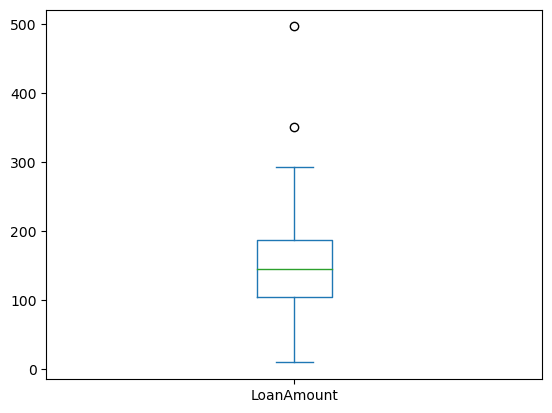

In [55]:
testdata.LoanAmount.plot( kind="box" )

<Axes: >

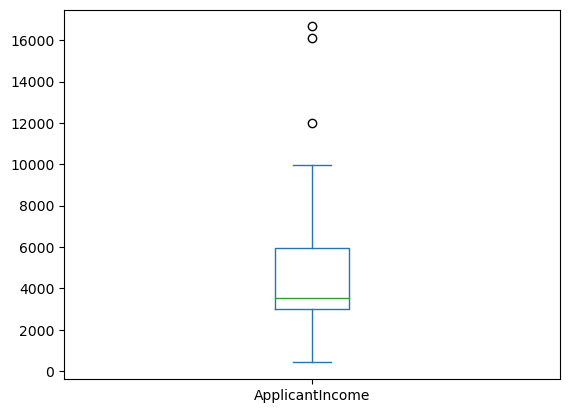

In [56]:
testdata.ApplicantIncome.plot( kind="box" )

# Handling Ourliers by using log by normalising it

In [57]:
testdata["LoanAmount_log"] = np.log(testdata["LoanAmount"])

<Axes: >

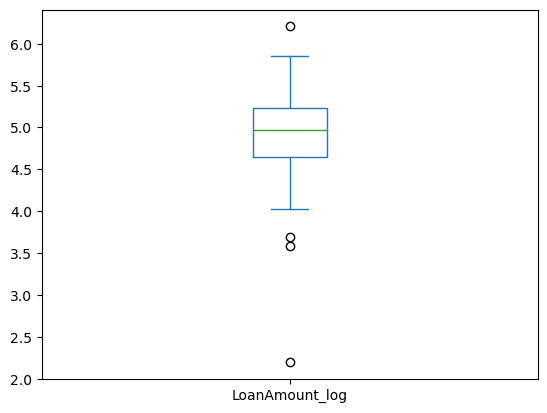

In [58]:
testdata.LoanAmount_log.plot(kind="box")

In [59]:
testdata["TotalIncome"]= testdata.ApplicantIncome + testdata.CoapplicantIncome

<Axes: >

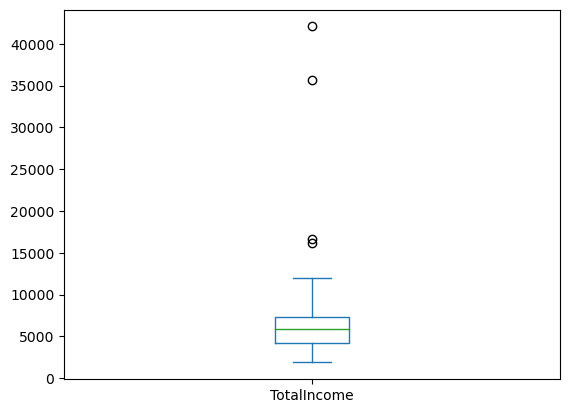

In [60]:
testdata.TotalIncome.plot(kind="box")

In [61]:
testdata["TotalIncome_log"]= np.log( testdata.TotalIncome )

<Axes: >

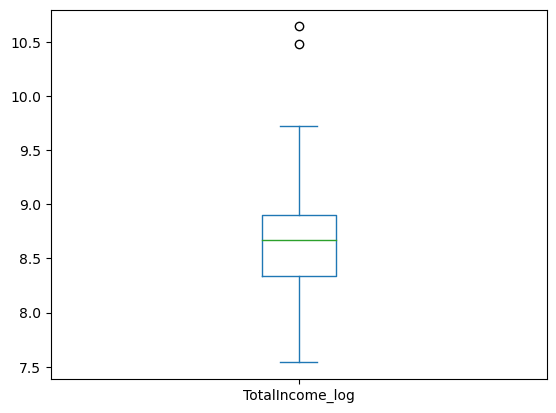

In [62]:
testdata.TotalIncome_log.plot(kind="box")

In [63]:
testdata.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [64]:
test= testdata.iloc[:, np.r_[1:5, 9:11, 13:15] ].values

In [65]:
for i in range (0,5):
    test[:, i]=labelencoder_X.fit_transform(test[:,i])

In [66]:
test=ss.fit_transform(test)

In [67]:
pred=NBClassifier.predict(test)
pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0])